# Homework 3
## Jiaqi Hu 
### 1 Autoencoder

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [0]:
from keras.callbacks import TensorBoard

history = autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 142us/step - loss: 0.3483 - val_loss: 0.3072
Epoch 2/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.3063 - val_loss: 0.3210
Epoch 3/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.2971 - val_loss: 0.2972
Epoch 4/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2922 - val_loss: 0.2959
Epoch 5/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2884 - val_loss: 0.2861
Epoch 6/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.2856 - val_loss: 0.2846
Epoch 7/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.2833 - val_loss: 0.2848
Epoch 8/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.2815 - val_loss: 0.2824
Epoch 9/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.2800 - val_loss: 0.2808
Epoc

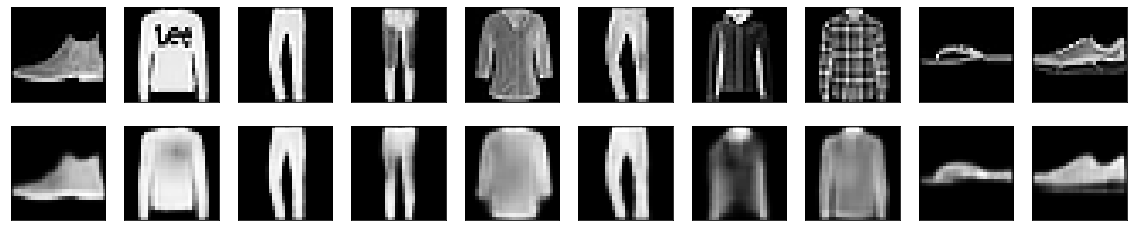

In [0]:
decoded_imgs = autoencoder.predict(x_test)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 2 Image Classification
#### 2.1 Deep CNN

In [0]:
from keras.applications import VGG16
from keras.preprocessing import image
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.viridis()

<Figure size 432x288 with 0 Axes>

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model_training = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          epochs=30, shuffle=True,
          batch_size=128,
         verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.5854 - acc: 0.7872 - val_loss: 0.3837 - val_acc: 0.8607
Epoch 2/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.3636 - acc: 0.8701 - val_loss: 0.3064 - val_acc: 0.8934
Epoch 3/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.3098 - acc: 0.8883 - val_loss: 0.2764 - val_acc: 0.9012
Epoch 4/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2720 - acc: 0.9009 - val_loss: 0.2473 - val_acc: 0.9097
Epoch 5/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2504 - acc: 0.9095 - val_loss: 0.2434 - val_acc: 0.9106
Epoch 6/30
60000/60000 [==============================] - 4s 71us/step - loss: 0.2326 - acc: 0.9153 - val_loss: 0.2356 - val_acc: 0.9130
Epoch 7/30
60000/60000 [==============================] - 4s 72us/step - loss: 0.2172 - acc: 0.9218 - val_loss: 0.2250 - val_a

<Figure size 432x288 with 0 Axes>

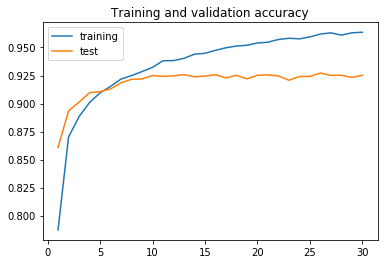

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),model_training.history["acc"],label='training')
plt.plot(range(1,31),model_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'upper left')
plt.figure()

<Figure size 432x288 with 0 Axes>

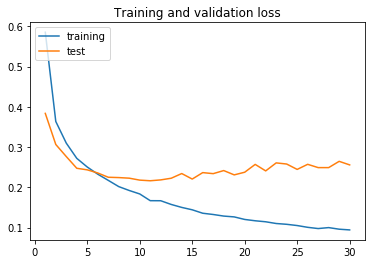

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),model_training.history["loss"],label='training')
plt.plot(range(1,31),model_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper left')
plt.figure()

In [0]:
score_train = model.evaluate(X_train,Y_train)

60000/60000 [==============================] - 5s 80us/step


In [0]:
score_train

[0.03953824028270319, 0.9893166666666666]

In [0]:
score = model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 1s 88us/step


In [0]:
score

[0.2556876685589552, 0.9252]

kernel size = (3,3)  
strides = (1,1)  
padding = 'valid'  
  
  
training accuracy: 0.9893  
training loss: 0.040   
test accuracy: 0.9252  
test loss: 0.2557

#### 2.2 Transfer Learning

In [0]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X = train_X.astype('float32')/255
test_X = test_X.astype('float32')/255

In [0]:
train_X = train_X.reshape(train_X.shape[0],28,28,1)
test_X = test_X.reshape(test_X.shape[0],28,28,1)
train_X.shape
test_X.shape


(10000, 28, 28, 1)

In [0]:
import cv2
train_X = np.asarray([cv2.resize(x,(32,32)) for x in train_X])
test_X = np.asarray([cv2.resize(x,(32,32)) for x in test_X])

In [0]:
train_X = train_X.reshape(train_X.shape[0],32,32,1)
test_X = test_X.reshape(test_X.shape[0],32,32,1)

In [0]:
train_X = train_X.repeat(3, axis=-1)
test_X = test_X.repeat(3, axis=-1)

In [0]:
train_X.shape,test_X.shape

((60000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
train_Y = np_utils.to_categorical(train_Y, 10)
test_Y = np_utils.to_categorical(test_Y, 10)

In [0]:
IMG_WIDTH = 32
IMG_HEIGHT = 32
IMG_DEPTH = 3
BATCH_SIZE = 128

In [0]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))
conv_base.trainable=False

In [0]:
model1 = Sequential()
model1.add(conv_base)
#model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation="softmax"))

In [0]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
model1.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 14,748,170
Trainable params: 33,482
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
model1_training = model1.fit(train_X, train_Y,
          epochs=30,validation_data=(test_X, test_Y),
          batch_size=128, shuffle=True,
         verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 18s 299us/step - loss: 0.7860 - acc: 0.7317 - val_loss: 0.5147 - val_acc: 0.8193
Epoch 2/30
60000/60000 [==============================] - 11s 182us/step - loss: 0.5171 - acc: 0.8168 - val_loss: 0.4633 - val_acc: 0.8341
Epoch 3/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.4673 - acc: 0.8323 - val_loss: 0.4321 - val_acc: 0.8411
Epoch 4/30
60000/60000 [==============================] - 11s 181us/step - loss: 0.4430 - acc: 0.8398 - val_loss: 0.4191 - val_acc: 0.8439
Epoch 5/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.4214 - acc: 0.8483 - val_loss: 0.4114 - val_acc: 0.8458
Epoch 6/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.4091 - acc: 0.8528 - val_loss: 0.4004 - val_acc: 0.8532
Epoch 7/30
60000/60000 [==============================] - 11s 180us/step - loss: 0.3974 - acc: 0.8550 - val_loss: 0.

<Figure size 432x288 with 0 Axes>

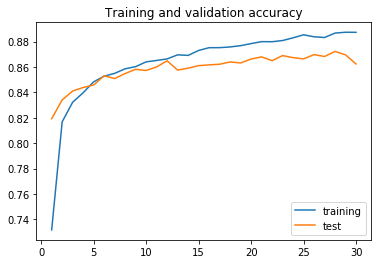

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),model1_training.history["acc"],label='training')
plt.plot(range(1,31),model1_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

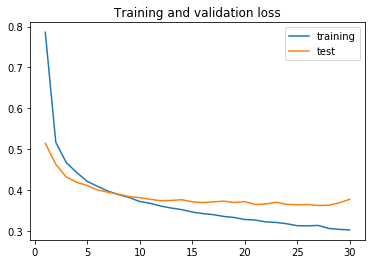

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),model1_training.history["loss"],label='training')
plt.plot(range(1,31),model1_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

In [0]:
score_train1 = model1.evaluate(train_X,train_Y)

60000/60000 [==============================] - 17s 286us/step


In [0]:
score1 = model1.evaluate(test_X, test_Y, verbose=1)

10000/10000 [==============================] - 3s 285us/step


In [0]:
score_train1

[0.27022660148541133, 0.8966166666666666]

In [0]:
score1

[0.37759087030887606, 0.8624]

training accuracy: 0.8966  
training loss: 0.2702   
test accuracy: 0.8624  
test loss: 0.3776

### 3 Text Classification
#### 3.1 RNN
SimpleRNN

In [0]:
import pandas as pd
from google.colab import files

In [4]:
uploaded = files.upload()

Saving tweets_with_labels.csv to tweets_with_labels.csv


In [0]:
import io

In [0]:
data = io.BytesIO(uploaded['tweets_with_labels.csv']) 

In [0]:
df = pd.read_csv(data,delimiter='\t')

In [0]:
df.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
from gensim.corpora import Dictionary

In [0]:
tweet = list(df['tweet'].map(lambda x:list(x)))
dct = Dictionary(tweet)

In [10]:
X = list(df['tweet'].map(lambda x: dct.doc2idx(list(x))))
print(X[0],df['tweet'][0])

[3, 5, 16, 16, 0, 7, 12, 13, 0, 5, 0, 4, 5, 8, 11, 15, 0, 2, 7, 14, 6, 13, 11, 12, 12, 11, 1, 0, 0, 17, 10, 8, 11, 9, 18] Jazz for a Rainy Afternoon:  {link}


In [0]:
y = df.loc[:,'k1':'k15']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [0]:
y_test.shape

(23384, 15)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.preprocessing.text import Tokenizer, one_hot
from keras.optimizers import RMSprop
from keras.preprocessing import sequence

Using TensorFlow backend.


In [14]:
maxlen = 50
max_features = len(dct)
max_features

94

In [15]:
X_train = sequence.pad_sequences(X_train, maxlen, padding="post", truncating="post")
X_test = sequence.pad_sequences(X_test, maxlen, padding="post", truncating="post")
X_train[0]

array([31,  6,  5, 14, 35,  6, 13,  0, 68, 10, 12, 34,  0, 17, 10,  8, 11,
        9, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

Categorical CrossEntropy:

In [0]:
rnn = Sequential()
rnn.add(Embedding(max_features, maxlen))
rnn.add(SimpleRNN(32))
rnn.add(Dense(15, activation='softmax'))

In [0]:
rnn.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])
print(rnn.summary())

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, None, 50)          4700      
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 32)                2656      
_________________________________________________________________
dense_49 (Dense)             (None, 15)                495       
Total params: 7,851
Trainable params: 7,851
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
rnn_training = rnn.fit(X_train, y_train, epochs=30, batch_size=128, 
            validation_data=(X_test, y_test))

Train on 54562 samples, validate on 23384 samples
Epoch 1/30
54562/54562 [==============================] - 15s 272us/step - loss: 2.6308 - acc: 0.2923 - val_loss: 2.5529 - val_acc: 0.3174
Epoch 2/30
54562/54562 [==============================] - 9s 169us/step - loss: 2.5293 - acc: 0.3364 - val_loss: 2.4978 - val_acc: 0.3569
Epoch 3/30
54562/54562 [==============================] - 9s 166us/step - loss: 2.4669 - acc: 0.3758 - val_loss: 2.4410 - val_acc: 0.3997
Epoch 4/30
54562/54562 [==============================] - 9s 167us/step - loss: 2.4115 - acc: 0.4117 - val_loss: 2.4048 - val_acc: 0.4210
Epoch 5/30
54562/54562 [==============================] - 9s 167us/step - loss: 2.3801 - acc: 0.4250 - val_loss: 2.3393 - val_acc: 0.4483
Epoch 6/30
54562/54562 [==============================] - 9s 166us/step - loss: 2.3620 - acc: 0.4335 - val_loss: 2.4283 - val_acc: 0.3867
Epoch 7/30
54562/54562 [==============================] - 9s 166us/step - loss: 2.3634 - acc: 0.4223 - val_loss: 2.3738 -

<Figure size 432x288 with 0 Axes>

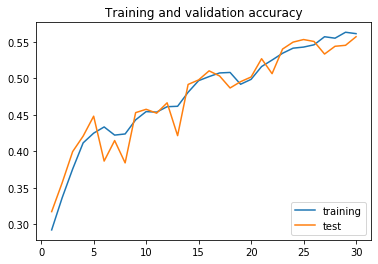

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),rnn_training.history["acc"],label='training')
plt.plot(range(1,31),rnn_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

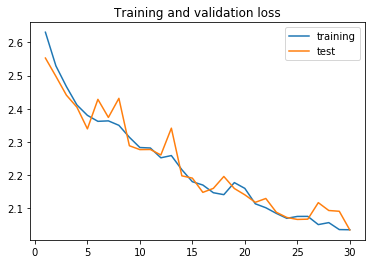

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),rnn_training.history["loss"],label='training')
plt.plot(range(1,31),rnn_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

sigmoid:

In [16]:
rnn1 = Sequential()
rnn1.add(Embedding(max_features, maxlen))
rnn1.add(SimpleRNN(32))
rnn1.add(Dense(15, activation='sigmoid'))

In [17]:
rnn1.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
rnn1_training = rnn1.fit(X_train, y_train, epochs=30, batch_size=128, 
            validation_data=(X_test, y_test))




Train on 54562 samples, validate on 23384 samples
Epoch 1/30





54562/54562 [==============================] - 12s 212us/step - loss: 0.2578 - acc: 0.8679 - val_loss: 0.2312 - val_acc: 0.8743
Epoch 2/30
54562/54562 [==============================] - 7s 137us/step - loss: 0.2310 - acc: 0.8748 - val_loss: 0.2297 - val_acc: 0.8744
Epoch 3/30
54562/54562 [==============================] - 7s 137us/step - loss: 0.2294 - acc: 0.8747 - val_loss: 0.2262 - val_acc: 0.8743
Epoch 4/30
54562/54562 [==============================] - 7s 134us/step - loss: 0.2277 - acc: 0.8747 - val_loss: 0.2360 - val_acc: 0.8691
Epoch 5/30
54562/54562 [==============================] - 8s 139us/step - loss: 0.2264 - acc: 0.8741 - val_loss: 0.2244 - val_acc: 0.8747
Epoch 6/30
54562/54562 [==============================] - 8s 140us/step - loss: 0.2237 - acc: 0.8745 - val_loss: 0.2204 - val_acc: 0.8747
Epoch 7/30
54562/54562 [==============================] - 8s 138us/step - loss: 0.2219 - acc: 0.8747 - val_loss: 

In [0]:
rnn1.predict(X_test[:5])

<Figure size 432x288 with 0 Axes>

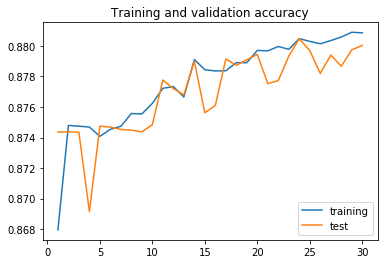

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),rnn1_training.history["acc"],label='training')
plt.plot(range(1,31),rnn1_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

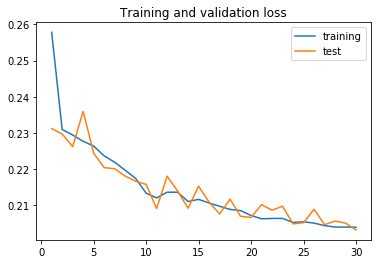

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(range(1,31),rnn1_training.history["loss"],label='training')
plt.plot(range(1,31),rnn1_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

#### 3.2 CNN
categorical crossentropy:

In [0]:
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, GlobalMaxPooling1D

In [0]:
cnn = Sequential()
cnn.add(Embedding(max_features, maxlen))
cnn.add(Dropout(0.25))
cnn.add(Conv1D(64, 5, activation='relu'))
cnn.add(GlobalMaxPooling1D())
cnn.add(Dense(15, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn_training = cnn.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

Train on 54562 samples, validate on 23384 samples
Epoch 1/30
54562/54562 [==============================] - 8s 154us/step - loss: 2.1145 - acc: 0.5390 - val_loss: 1.7989 - val_acc: 0.6359
Epoch 2/30
54562/54562 [==============================] - 2s 46us/step - loss: 1.7620 - acc: 0.6504 - val_loss: 1.7244 - val_acc: 0.6569
Epoch 3/30
54562/54562 [==============================] - 2s 45us/step - loss: 1.7163 - acc: 0.6636 - val_loss: 1.7044 - val_acc: 0.6654
Epoch 4/30
54562/54562 [==============================] - 3s 46us/step - loss: 1.6931 - acc: 0.6676 - val_loss: 1.6845 - val_acc: 0.6659
Epoch 5/30
54562/54562 [==============================] - 3s 46us/step - loss: 1.6795 - acc: 0.6706 - val_loss: 1.6747 - val_acc: 0.6707
Epoch 6/30
54562/54562 [==============================] - 3s 46us/step - loss: 1.6693 - acc: 0.6734 - val_loss: 1.6699 - val_acc: 0.6731
Epoch 7/30
54562/54562 [==============================] - 2s 45us/step - loss: 1.6604 - acc: 0.6739 - val_loss: 1.6627 - val_ac

<Figure size 432x288 with 0 Axes>

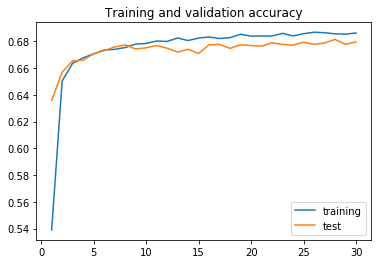

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),cnn_training.history["acc"],label='training')
plt.plot(range(1,31),cnn_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

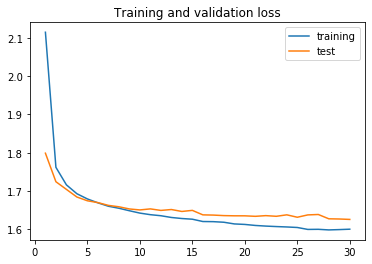

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(range(1,31),cnn_training.history["loss"],label='training')
plt.plot(range(1,31),cnn_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

sigmoid:

In [24]:
cnn1 = Sequential()
cnn1.add(Embedding(max_features, maxlen))
cnn1.add(Dropout(0.25))
cnn1.add(Conv1D(64, 5, activation='relu'))
cnn1.add(GlobalMaxPooling1D())
cnn1.add(Dense(15, activation='sigmoid'))
cnn1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])

cnn1_training = cnn1.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 54562 samples, validate on 23384 samples
Epoch 1/30
54562/54562 [==============================] - 5s 92us/step - loss: 0.2443 - acc: 0.8749 - val_loss: 0.1788 - val_acc: 0.8916
Epoch 2/30
54562/54562 [==============================] - 2s 41us/step - loss: 0.1687 - acc: 0.8948 - val_loss: 0.1607 - val_acc: 0.8961
Epoch 3/30
54562/54562 [==============================] - 2s 40us/step - loss: 0.1574 - acc: 0.8981 - val_loss: 0.1542 - val_acc: 0.8982
Epoch 4/30
54562/54562 [==============================] - 2s 40us/step - loss: 0.1534 - acc: 0.8991 - val_loss: 0.1523 - val_acc: 0.8989
Epoch 5/30
54562/54562 [==============================] - 2s 42us/step - loss: 0.1514 - acc: 0.8996 - val_loss: 0.1516 - val_acc: 0.8986
Epoch 6/30
54562/54562 [==============================] - 2s 40us/step - loss: 0.1503 - acc: 0.8998 - val_loss: 0.1503 - val_acc: 0.8993
Epoch 7/30
5

<Figure size 432x288 with 0 Axes>

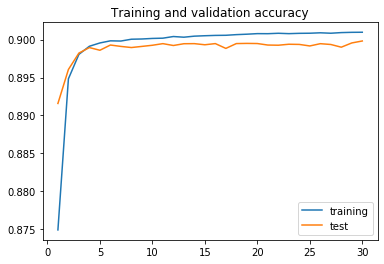

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(range(1,31),cnn1_training.history["acc"],label='training')
plt.plot(range(1,31),cnn1_training.history['val_acc'],label='test')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

<Figure size 432x288 with 0 Axes>

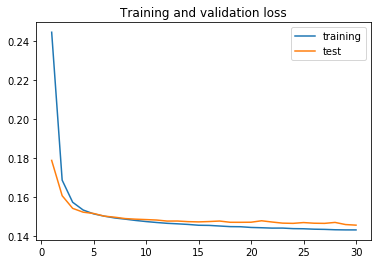

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(range(1,31),cnn1_training.history["loss"],label='training')
plt.plot(range(1,31),cnn1_training.history['val_loss'],label='test')
plt.title('Training and validation loss')
plt.legend(loc = 'upper right')
plt.figure()

#### 3.3 
Both RNN and CNN show that use sigmoid outputs are better.

<Figure size 432x288 with 0 Axes>

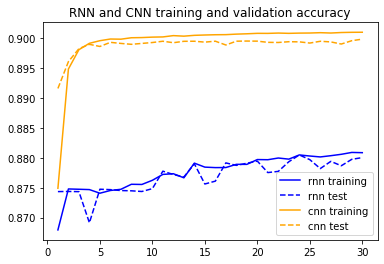

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(range(1,31),rnn1_training.history["acc"],label='rnn training',color='b')
plt.plot(range(1,31),rnn1_training.history['val_acc'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,31),cnn1_training.history["acc"],label='cnn training',color='orange')
plt.plot(range(1,31),cnn1_training.history['val_acc'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

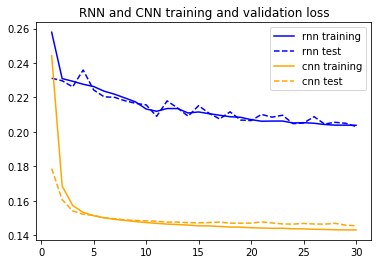

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(range(1,31),rnn1_training.history["loss"],label='rnn training',color='b')
plt.plot(range(1,31),rnn1_training.history['val_loss'],label='rnn test',linestyle='dashed',color='b')
plt.plot(range(1,31),cnn1_training.history["loss"],label='cnn training',color='orange')
plt.plot(range(1,31),cnn1_training.history['val_loss'],label='cnn test',linestyle='dashed',color='orange')
plt.legend(loc = 'best')
plt.title('RNN and CNN training and validation loss')
plt.figure()

In [0]:
from sklearn.metrics import roc_curve, auc
import numpy as np

In [0]:
y_pred_rnn = rnn1.predict(X_test)
y_pred_cnn = cnn1.predict(X_test)

In [0]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(15):
    pred = [j == max(y_test.iloc[i]) for j in y_test.iloc[i]]
    fpr[i], tpr[i], _ = roc_curve(pred, np.array(y_pred_cnn[i]))
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
for i in range(15):
    pred = [j == max(y_test.iloc[i]) for j in y_test.iloc[i]]
    fpr1[i], tpr1[i], _ = roc_curve(pred, np.array(y_pred_rnn[i]))
    roc_auc1[i] = auc(fpr1[i], tpr1[i])

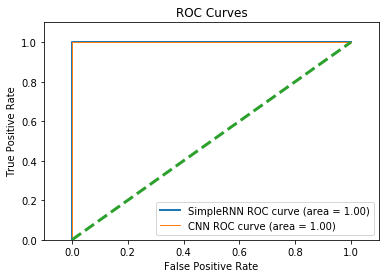

In [43]:
plt.figure()
plt.plot(fpr[2], tpr[2],
         lw=2, label='SimpleRNN ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot(fpr1[2], tpr1[2],
         lw=1, label='CNN ROC curve (area = %0.2f)' % roc_auc[3])
plt.plot([0, 1], [0, 1], lw=3, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

Both ROC Curves have area 1.  
CNN model has higher accuracy rate and lower loss.  
Also, CNN model converges faster than RNN model.
CNN model perferms lightly better.